# p値で切り、semplotするサンプルコード

In [101]:
import numpy as np
import pandas as pd
from semopy import Model

# 仮想データの生成
np.random.seed(123)
n_samples = 100
data = {
    'x1': np.random.normal(0, 10, n_samples),
    'x2': np.random.normal(0, 3, n_samples),
    'x3': np.random.normal(0, 50, n_samples),
    'x4': np.random.normal(0, 100, n_samples),
    'y1': np.random.normal(0, 90, n_samples),
    'y2': np.random.normal(0, 75, n_samples)
}
data = pd.DataFrame(data)

# モデルの定義
model_desc = """
x1 ~ y1 + y2
x2 ~ x1 + y1
x3 ~ x2 + x1
x4 ~ x3 + x2
"""

# モデルの推定
model = Model(model_desc)
result = model.fit(data)

# 推定結果の取得
params = model.inspect()

display(params)


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,x1,~,y1,0.000667,0.011760,0.056699,9.547849e-01
1,x1,~,y2,0.032902,0.014842,2.216915,2.662887e-02
2,x2,~,x1,-0.004821,0.025479,-0.189212,8.499263e-01
3,x2,~,y1,-0.004791,0.003069,-1.560966,1.185318e-01
4,x3,~,x2,0.376844,1.780326,0.211672,8.323633e-01
5,x3,~,x1,-0.258080,0.459183,-0.562041,5.740882e-01
6,x4,~,x3,0.335929,0.126335,2.659041,7.836342e-03
7,x4,~,x2,2.609355,2.252855,1.158244,2.467646e-01
8,x1,~~,x1,121.333062,17.159086,7.071068,1.537437e-12
9,x2,~~,x2,8.263782,1.168675,7.071068,1.537437e-12


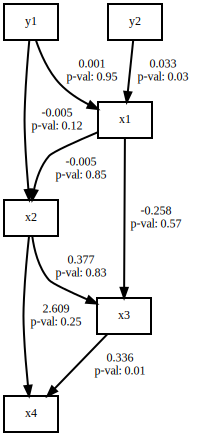

In [102]:
from semopy import semplot

# パス図の描画（そのまま）
semplot(model, 'sem.png', inspection=params, plot_ests=True, engine='dot')

In [103]:
# 文字列データが含まれているのでそれを削除
params = params[params['p-value'] != '-']
# floatに直し、小数点第3位まで表示
params['p-value'] = params['p-value'].astype(float).map(lambda x: round(x, 3))

# p値が0.05を下回るものをフィルタリング
significant_params = params[params['p-value'] < 0.05]

# 結果の表示
display(significant_params)


,lval,op,rval,Estimate,Std. Err,z-value,p-value
1,x1,~,y2,0.032902,0.014842,2.216915,0.027
6,x4,~,x3,0.335929,0.126335,2.659041,0.008
8,x1,~~,x1,121.333062,17.159086,7.071068,0.000
9,x2,~~,x2,8.263782,1.168675,7.071068,0.000
10,x3,~~,x3,2683.076496,379.444317,7.071068,0.000
11,x4,~~,x4,4295.840366,607.523571,7.071068,0.000


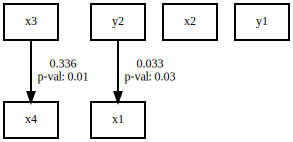

In [104]:
# パス図の描画（有意なパラメータのみ）
semplot(model, 'sem.png', inspection=significant_params, plot_ests=True, engine='dot')